In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
from dendrogram_cut import DendrogramCut

In [3]:
import numpy as np
import sklearn
import sklearn.datasets
from scipy.spatial.distance import pdist, squareform

centers = np.asarray([[-6.8, -7.3], [5, 2.5], [5, -2.5]])
samples = np.asarray([4, 1, 1]) * 50

X, Z, C = sklearn.datasets.make_blobs(
    samples,
    cluster_std=[2, 1, 1],
    centers=centers,
    return_centers=True)
dist = pdist(X)
dist = squareform(dist)

<ipython-input-4-ad5a2b99ea74>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


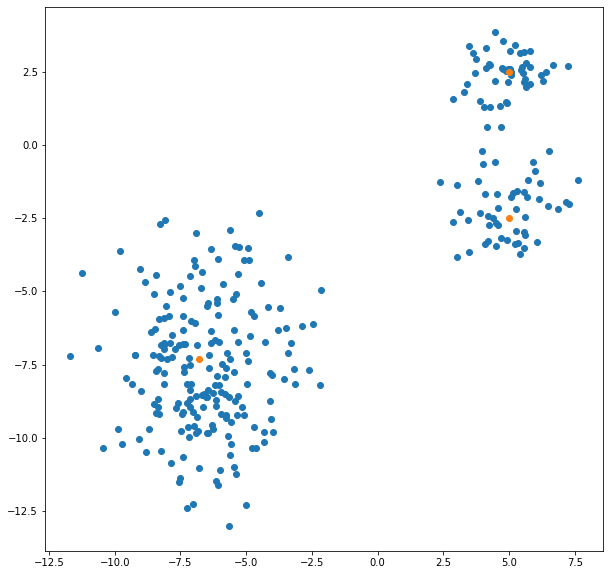

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1])
ax.scatter(C[:, 0], C[:, 1])
fig.show()

In [5]:
model = DendrogramCut(10, method='average').fit(dist)

In [6]:
k = model.pac_bayesian_cut(lambda_=0.2)
print(k)

3


In [7]:
model.dendrogram_plot(k=4, label=Z)

![title](dendrogram.png)

In [8]:
model.heatmap_with_dendrogram_plot(k=3)

![title](heatmap.png)